### LINEAR REGRESSION MODEL WITH SCALED DATA

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [32]:
file_path = '/Users/admin/code/derksol/finance/raw_data/data1and2_processed_unscaled.csv'

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Drop the unnamed column in-place
data_df.drop(columns=['Unnamed: 0'], inplace=True)

data_df.head(5)

,symbol,time_frame,date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,...,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,close,close_vs_market
0,AABPX,2023Q3 vs 2023Q2,2023-06-30,0.061599,-7.090000e-01,-0.157992,-0.180327,-0.257108,-0.083661,-0.096105,...,0.192815,0.161174,0.161174,-8.532307,-0.079013,-0.039073,0.023658,0.066984,0.030212,0.052566
1,AABPX,2023Q2 vs 2023Q1,2023-03-31,0.145790,-1.591602e+00,0.433673,0.444980,-0.194237,0.060572,0.051795,...,-0.290884,-0.285292,-0.285292,-1.562722,-0.105720,0.051650,-0.048354,-0.033864,-0.010530,0.064567
2,AABPX,2023Q1 vs 2022Q4,2022-12-31,-0.216065,-5.058721e-01,-1.405002,-1.449164,-0.033316,0.017841,0.058061,...,-3.259374,-3.505739,-3.505739,0.554023,0.294532,0.177778,0.092037,-0.002959,-0.054566,-0.068307
3,AABPX,2022Q3 vs 2022Q2,2022-06-30,0.040987,1.639538e-08,-4.675824,-9.083313,-0.044171,-0.045420,-0.105457,...,-1.116304,-1.255758,-1.255758,-0.932636,-0.096896,0.086524,-0.107172,-0.015148,-0.030958,0.019050
4,AABPX,2022Q1 vs 2021Q4,2021-12-31,-0.052030,1.061740e+00,-1.377715,-1.423833,0.108110,0.038291,0.078648,...,-3.318279,-3.601335,-3.601335,-1.049837,0.036491,0.031153,-0.291034,-0.053673,-0.077766,0.076350


In [33]:
# Define X and y features
X = data_df.drop(['symbol', 'time_frame', 'date', 'close', 'close_vs_market'], axis=1)  # drop symbol, timeframe, date, and close_vs_market - y target
y = data_df['close_vs_market']



NameError: name 'data_df' is not defined

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [36]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 0.11492547636017203


In [37]:
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


R-squared: 0.22088026314884945


## Exploration- learning rate

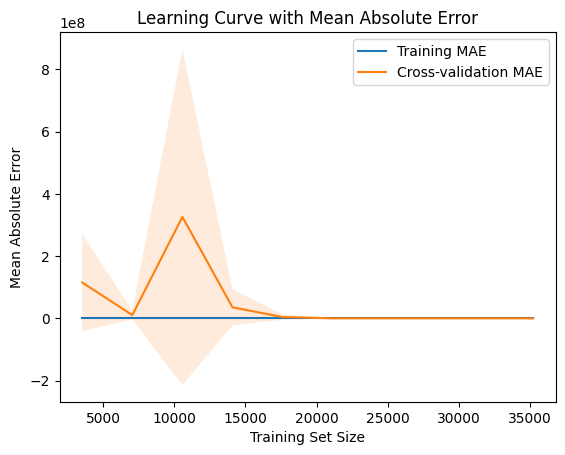

In [38]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# model is trained linear regression model
train_sizes, train_mae, test_mae = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mae_mean = -np.mean(train_mae, axis=1)
train_mae_std = np.std(train_mae, axis=1)
test_mae_mean = -np.mean(test_mae, axis=1)
test_mae_std = np.std(test_mae, axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_mae_mean, label='Training MAE')
plt.fill_between(train_sizes, train_mae_mean - train_mae_std, train_mae_mean + train_mae_std, alpha=0.15)
plt.plot(train_sizes, test_mae_mean, label='Cross-validation MAE')
plt.fill_between(train_sizes, test_mae_mean - test_mae_std, test_mae_mean + test_mae_std, alpha=0.15)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve with Mean Absolute Error')
plt.legend(loc='best')
plt.show()


### Trying with Polynominal features

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2  # Set the degree of the polynomial
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())


In [40]:
# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test set
predictions = model2.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 0.18391418183461875


### Testing different features


In [46]:
data_df.head(5)

,symbol,time_frame,date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,...,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,close,close_vs_market
0,AABPX,2023Q3 vs 2023Q2,2023-06-30,0.061599,-7.090000e-01,-0.157992,-0.180327,-0.257108,-0.083661,-0.096105,...,0.192815,0.161174,0.161174,-8.532307,-0.079013,-0.039073,0.023658,0.066984,0.030212,0.052566
1,AABPX,2023Q2 vs 2023Q1,2023-03-31,0.145790,-1.591602e+00,0.433673,0.444980,-0.194237,0.060572,0.051795,...,-0.290884,-0.285292,-0.285292,-1.562722,-0.105720,0.051650,-0.048354,-0.033864,-0.010530,0.064567
2,AABPX,2023Q1 vs 2022Q4,2022-12-31,-0.216065,-5.058721e-01,-1.405002,-1.449164,-0.033316,0.017841,0.058061,...,-3.259374,-3.505739,-3.505739,0.554023,0.294532,0.177778,0.092037,-0.002959,-0.054566,-0.068307
3,AABPX,2022Q3 vs 2022Q2,2022-06-30,0.040987,1.639538e-08,-4.675824,-9.083313,-0.044171,-0.045420,-0.105457,...,-1.116304,-1.255758,-1.255758,-0.932636,-0.096896,0.086524,-0.107172,-0.015148,-0.030958,0.019050
4,AABPX,2022Q1 vs 2021Q4,2021-12-31,-0.052030,1.061740e+00,-1.377715,-1.423833,0.108110,0.038291,0.078648,...,-3.318279,-3.601335,-3.601335,-1.049837,0.036491,0.031153,-0.291034,-0.053673,-0.077766,0.076350


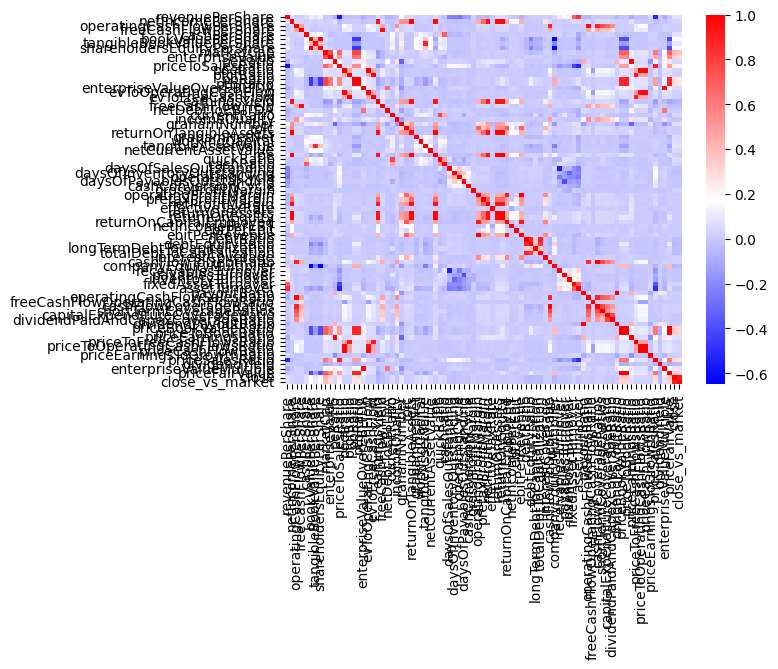

In [69]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = data_df.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [70]:

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [58]:

X1 = data_df.drop(['symbol', 'time_frame' , 'date' , 'revenuePerShare' , 'netIncomePerShare' , 'operatingCashFlowPerShare' , 'freeCashFlowPerShare' , 'cashPerShare' , 'bookValuePerShare' , 'tangibleBookValuePerShare', 'close', 'close_vs_market'], axis=1)  # drop symbol, timeframe, date, and close_vs_market - y target
y1 = data_df['close_vs_market']

In [60]:
X1

,shareholdersEquityPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,enterpriseValueOverEBITDA,...,priceToBookRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
0,-0.083661,0.036993,0.049974,2.359857,-0.079013,0.161174,0.192815,0.066984,0.066984,0.023658,...,0.066984,2.359857,0.192815,0.161174,0.161174,-8.532307,-0.079013,-0.039073,0.023658,0.066984
1,0.060572,-0.049113,-0.035456,-2.732004,-0.105720,-0.285292,-0.290884,-0.033864,-0.033864,-0.048354,...,-0.033864,-2.732004,-0.290884,-0.285292,-0.285292,-1.562722,-0.105720,0.051650,-0.048354,-0.033864
2,0.017841,0.010555,0.013950,1.053777,0.294532,-3.505739,-3.259374,-0.002959,-0.002959,0.092037,...,-0.002959,1.053777,-3.259374,-3.505739,-3.505739,0.554023,0.294532,0.177778,0.092037,-0.002959
3,-0.045420,-0.072131,-0.073183,-0.059880,-0.096896,-1.255758,-1.116304,-0.015148,-0.015148,-0.107172,...,-0.015148,-0.059880,-1.116304,-1.255758,-1.255758,-0.932636,-0.096896,0.086524,-0.107172,-0.015148
4,0.038291,-0.028576,-0.033822,-0.523430,0.036491,-3.601335,-3.318279,-0.053673,-0.053673,-0.291034,...,-0.053673,-0.523430,-3.318279,-3.601335,-3.601335,-1.049837,0.036491,0.031153,-0.291034,-0.053673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44019,-0.013089,0.012444,0.217572,-5.017936,0.123795,-3.933835,-3.106223,0.013263,0.013263,2.307196,...,-0.130123,-4.449363,-2.808174,-3.518671,-3.518671,-2.546527,-0.035232,0.093599,1.444690,-0.130123
44020,0.060196,0.001187,-0.248476,0.737636,-0.132183,-0.377248,-0.513743,-0.056778,-0.056778,0.210536,...,-0.082738,0.689811,-0.527127,-0.394388,-0.394388,-0.932636,-0.156068,0.093599,0.487006,-0.082738
44021,0.147715,0.002931,0.067271,0.345680,-0.023432,-3.594043,-2.199670,-0.128703,-0.128703,0.253096,...,-0.287810,0.099946,-1.980599,-3.120346,-3.120346,-5.214414,-0.201763,0.093599,-0.013159,-0.287810
44022,0.083525,0.095057,0.125743,-2.075857,-0.387996,2.942201,1.189381,-0.077086,-0.077086,-0.895534,...,0.490858,-2.737920,2.536686,5.368158,5.368158,7.106365,-0.011380,0.093599,-0.838649,0.490858


In [61]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X1_train, y1_train)

# Make predictions on the test set
predictions = model.predict(X1_test)


In [62]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 0.11588824135759536


### More experimentation - XG BOOST MODEL
Extreme Gradient Boosting technique

In [71]:
import xgboost
# Our classic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost

In [74]:
# Load the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Fit our model
model_tree = xgboost.XGBRegressor(n_estimators=100, max_depth=2)
model_tree.fit(X_train, y_train)

# Predict
predictions = model_tree.predict(X_test)

In [75]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.11537320906983813


### Random Forest Regression (RFR) trial

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = regr.predict(X_test_scaled)

# Print the predicted values
print("Predicted Values:")
print(y_pred)







Predicted Values:
[-22.99138342 -17.27144178  41.28554365 -35.83467855 -29.06114041
 -22.26188596  43.03254739 -31.84263248 -37.41582411  17.43481264
 -22.26188596 -25.41676179 -21.90716049 -10.32898561  -3.40884433
  -2.71243183 -19.03545246  -3.40884433 -13.0695593  -10.32898561]


In [119]:

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 16.145719419528294


### FINAL DATAFRAME BEFORE LINKING TO THE USER INTERFACE


In [44]:
file_path = '/Users/admin/code/derksol/finance/raw_data/df_new.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head(5)

,Unnamed: 0,symbol,time_frame,date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,...,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities,size_large,size_medium,size_small,str_temp,quarter_final,close
0,0,AADI,2023Q3 vs 2023Q2,2023-06-30,-0.041591,-0.095147,-0.288637,-0.253954,-0.117529,-0.102873,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023Q3,2023Q3,4.439268
1,1,AADI,2023Q2 vs 2023Q1,2023-03-31,0.056452,0.312962,-0.214090,-0.231169,-0.108269,-0.100334,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023Q2,2023Q2,5.812778
2,2,AADI,2023Q1 vs 2022Q4,2022-12-31,0.121455,-0.017612,0.882517,0.989732,-0.124704,-0.079053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023Q1,2023Q1,7.773548
3,3,AADI,2022Q4 vs 2022Q3,2022-09-30,-0.024206,-0.172246,0.093697,0.087702,-0.252767,-0.257811,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022Q4,2022Q4,19.165484
4,4,AADI,2022Q3 vs 2022Q2,2022-06-30,0.217743,-0.281190,-0.246277,-0.253674,0.519635,0.533459,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022Q3,2022Q3,13.056667


In [41]:
def model_chosen(size, sector): # Paramters here need be strings (e.g. 'small', 'indutrials')
    # This will split dataset by chosen sector (sector will be matched by chosen drop down list of sector options)
    sector_input = sector # This should be inputted as a string
    sector_input = sector_input.title() ## This will capitalise first letter of each word to align with sector column names
    df_by_sector = df[df[f'sector_{sector_input}'] == 1]
    df_by_sector.head()
    # This will split this previous dataset by chosen size (size will be matched by chosen drop down list of size options)
    size_input = size # This should be interpreted as a string
    size_input = size_input.lower() ## This will make letters of each word lowercase to align with size column names
    df_by_both = df_by_sector[df_by_sector[f'size_{size_input}'] == 1]
    df_by_both.head()
    
    #Create column for average quarterly return in new dataframe
    df_return = df_by_both.groupby('symbol').mean()[['close_percent']].reset_index()
    df_return.sort_values(by=['close_percent'], inplace=True, ascending=False)
    df_return.rename(columns={'close_percent':'avg_quarterly_return'}, inplace=True)

    # Create column for average volatility in new dataframe
    df_volatility = df_by_both.groupby('symbol').std()[['close_percent']].reset_index()
    df_volatility.sort_values(by=['close_percent'], inplace=True, ascending=False)
    df_volatility.rename(columns={'close_percent':'volatility'}, inplace=True)
    
    # Merge these into one
    df_merged = pd.merge(df_return, df_volatility[['symbol', 'volatility']], how='left', left_on=['symbol'], right_on=['symbol'])
    if risk == 'high':
        return df_merged.sort_values(by=['avg_quarterly_return'], ascending=False).head(10)[['symbol', 'avg_quarterly_return']]
    elif risk == 'medium':  # Changed to 'elif'
        return df_merged[df_merged['volatility'] < 0.4].sort_values(by=['avg_quarterly_return'], ascending=False).head(5)
    elif risk == 'low':  # Changed to 'elif'
        return df_merged[df_merged['volatility'] < 0.2].sort_values(by=['avg_quarterly_return'], ascending=False).head(5)
        
    #return df_by_both # This should return a model based on users chosen size and sector

NameError: name 'df_by_sector' is not defined

In [37]:
model_chosen("medium","Technology").head(10)


NameError: name 'risk' is not defined

In [46]:
model_result = model_chosen("medium", "Technology").head(10)
refined_df = model_result[['symbol', 'close']].round({'close': 2})
refined_df


NameError: name 'risk' is not defined

### UNDERSTANDING THE STOCK GRAPH


In [52]:
file_path = '/Users/admin/code/derksol/finance/raw_data/df_graph.csv'

# Read the CSV file into a DataFrame
df_graph = pd.read_csv(file_path)

df_graph.head()


,Unnamed: 0,close_actual,quarter,symbol,year_adj,close_percent_actual,close,close_percent,predicted_price_change,close_predict,companyName,sector,country,description,website,state,image
0,0,85.164706,2017Q4,AADI,2017Q3,-0.070966,85.164706,-0.070966,-0.070966,85.164706,"Aadi Bioscience, Inc.",Healthcare,US,"Aadi Bioscience, Inc., a clinical-stage biopha...",https://aadibio.com,CA,https://financialmodelingprep.com/image-stock/...
1,1,71.642982,2018Q1,AADI,2017Q4,-0.158771,71.642982,-0.158771,-0.158771,71.642982,"Aadi Bioscience, Inc.",Healthcare,US,"Aadi Bioscience, Inc., a clinical-stage biopha...",https://aadibio.com,CA,https://financialmodelingprep.com/image-stock/...
2,2,59.341406,2018Q2,AADI,2018Q1,-0.171707,59.341406,-0.171707,-0.171707,59.341406,"Aadi Bioscience, Inc.",Healthcare,US,"Aadi Bioscience, Inc., a clinical-stage biopha...",https://aadibio.com,CA,https://financialmodelingprep.com/image-stock/...
3,3,56.139524,2018Q3,AADI,2018Q2,-0.053957,56.139524,-0.053957,-0.053957,56.139524,"Aadi Bioscience, Inc.",Healthcare,US,"Aadi Bioscience, Inc., a clinical-stage biopha...",https://aadibio.com,CA,https://financialmodelingprep.com/image-stock/...
4,4,31.834444,2018Q4,AADI,2018Q3,-0.432941,31.834444,-0.432941,-0.432941,31.834444,"Aadi Bioscience, Inc.",Healthcare,US,"Aadi Bioscience, Inc., a clinical-stage biopha...",https://aadibio.com,CA,https://financialmodelingprep.com/image-stock/...


In [62]:
df_graph.iloc[-2, 0]

55844

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def stock_graph(symbol, n_years, df):
    df_symbol = df[df['symbol'] == symbol].tail(n_years*4) # Here, can change .head based on user parameter (e.g., 2 years/ 8 quarters = head(8))
    df_symbol = df_symbol[['year_adj', 'close', 'close_predict']]
    df_symbol.rename(columns= {'close': 'Actual stock price', 'close_predict': 'Predicted stock price'}, inplace=True)
    df_symbol.set_index('year_adj', inplace=True)
    df_symbol.iloc[:-2, 1] = np.nan
    # Add a graph next to it for a chosen feature to analyse its % change alongside stock price change
    sns.set_theme(style="whitegrid") # White grid background
    plt.figure(figsize=(14, 5)) # Changing figure size
    plt.title(f'Quarterly Stock Price for {symbol}', fontsize=16, color='Black', pad='20', fontstyle='italic')
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.locator_params(nbins=6)
    plt.xticks(
        rotation=45,
        horizontalalignment='center',
        fontweight='light',
        fontsize='medium'
    )
sns.lineplot(data=df_symbol, linewidth=4)

NameError: name 'df_symbol' is not defined

In [57]:
comp = ["Aaaa", "bbbb", "ccccc","dddd"]

In [58]:
index = ["a", 'b', 'c', 'd']

In [60]:
comp.index("bbbb")

1

In [73]:
df_graph[df_graph["symbol"] == "AAPL"]["description"].head(1).unique()[0]

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple P